## ヒートマップでやりたいこと
- 縦bit, 横chain_strength, 値valid_y_num
- 縦bit, 横chain_strength, 値broken_chain_proportion

In [12]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/QA


In [13]:
import aws_QA_DwaveSampler_AutoEmbedding as aqa
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math
import datetime
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
print(datetime.datetime.now())

2021-01-13 21:58:22.653863


In [15]:
chain_strength_list = [5, 10, 15, 20, 25, 30, 35]
#chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}

In [16]:
bit_list = [20, 25, 30, 35, 40]
bit_46_list = [20, 25, 30, 35, 40, 46]
num_list = [0, 1, 2, 3, 4]
n, num_reads = 1, 10000

In [17]:
broken_chain_proportion_dic = {}
valid_y_num_dic = {}
for bit in bit_46_list:
    broken_chain_proportion_dic[bit] = {}
    broken_chain_proportion_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}
    valid_y_num_dic[bit] = {}
    valid_y_num_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}

In [18]:
broken_chain_proportion_dic

{20: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 25: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 30: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 35: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 40: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 46: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []}}

In [19]:
valid_y_num_dic

{20: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 25: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 30: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 35: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 40: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 46: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []}}

In [26]:
ll = [7, 7, 7]

ll_i = [4, 5, 5]

ll.append(ll_i)

In [27]:
ll

[7, 7, 7, [4, 5, 5]]

## 予備実験

In [29]:
broken_chain_proportion_dic = {}
valid_y_num_dic = {}
for bit in bit_46_list:
    broken_chain_proportion_dic[bit] = {}
    broken_chain_proportion_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}
    valid_y_num_dic[bit] = {}
    valid_y_num_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}


for jj in range(2):
    for bit in [20, 46]:
        if bit != 46:
            for num in [3]:
                path = '../input/ost{}_{}.csv'.format(bit, num)
                df = pd.read_csv(path, sep=',')
                bqm = aqa.make_Hamiltonian(df)

                for chain_strength in [10, 30]:
                    res = aqa.aws_get_response(bqm, chain_strength, num_reads)
                    ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
                    valid_y_info_dic = ads.find_valid_y()

                    if len(valid_y_info_dic) > 0:
                        broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                        broken_chain_proportion_dic[bit][chain_strength].append(statistics.mean(broken_list))
                        valid_y_num_dic[bit][chain_strength].append(len(valid_y_info_dic))

        else:
            path = '../input/ost{}.csv'.format(bit)
            df = pd.read_csv(path, sep=',')
            bqm = aqa.make_Hamiltonian(df)

            for chain_strength in [10, 30]:
                res = aqa.aws_get_response(bqm, chain_strength, num_reads)
                ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
                valid_y_info_dic = ads.find_valid_y()

                if len(valid_y_info_dic) > 0:
                    broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                    broken_chain_proportion_dic[bit][chain_strength].append(statistics.mean(broken_list))
                    valid_y_num_dic[bit][chain_strength].append(len(valid_y_info_dic))
    print('{} times finished'.format(jj+1))

1 times finished
2 times finished


In [30]:
broken_chain_proportion_dic

{20: {5: [],
  10: [0.0033557046979865775, 0.002620967741935484],
  15: [],
  20: [],
  25: [],
  30: [0.0, 0.0006756756756756757],
  35: []},
 25: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 30: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 35: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 40: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 46: {5: [],
  10: [],
  15: [],
  20: [],
  25: [],
  30: [0.008695652173913044],
  35: []}}

In [31]:
valid_y_num_dic

{20: {5: [], 10: [149, 248], 15: [], 20: [], 25: [], 30: [74, 74], 35: []},
 25: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 30: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 35: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 40: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [], 35: []},
 46: {5: [], 10: [], 15: [], 20: [], 25: [], 30: [5], 35: []}}

## 本番：それぞれのbit_numにたいして5回、それぞれのbitデータに対して25回回し、データを得る

In [36]:
import aws_QA_DwaveSampler_AutoEmbedding as aqa
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math
import datetime
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
print(datetime.datetime.now())

2021-01-14 09:06:45.341335


In [38]:
chain_strength_list = [5, 10, 15, 20, 25, 30, 35]
bit_list = [20, 25, 30, 35, 40]
bit_46_list = [20, 25, 30, 35, 40, 46]
num_list = [0, 1, 2, 3, 4]
n, num_reads = 1, 10000


broken_chain_proportion_dic = {}
valid_y_num_dic = {}
for bit in bit_46_list:
    broken_chain_proportion_dic[bit] = {}
    broken_chain_proportion_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}
    valid_y_num_dic[bit] = {}
    valid_y_num_dic[bit] = {chain_strength:[] for chain_strength in chain_strength_list}


for jj in range(2):
    for bit in bit_46_list:
        if bit != 46:
            for num in num_list:
                path = '../input/ost{}_{}.csv'.format(bit, num)
                df = pd.read_csv(path, sep=',')
                bqm = aqa.make_Hamiltonian(df)

                for chain_strength in chain_strength_list:
                    res = aqa.aws_get_response(bqm, chain_strength, num_reads)
                    ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
                    valid_y_info_dic = ads.find_valid_y()

                    if len(valid_y_info_dic) > 0:
                        broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                        broken_chain_proportion_dic[bit][chain_strength].append(statistics.mean(broken_list))
                        valid_y_num_dic[bit][chain_strength].append(len(valid_y_info_dic))
        else:
            path = '../input/ost{}.csv'.format(bit)
            df = pd.read_csv(path, sep=',')
            bqm = aqa.make_Hamiltonian(df)

            for chain_strength in chain_strength_list:
                res = aqa.aws_get_response(bqm, chain_strength, num_reads)
                ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
                valid_y_info_dic = ads.find_valid_y()

                if len(valid_y_info_dic) > 0:
                    broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                    broken_chain_proportion_dic[bit][chain_strength].append(statistics.mean(broken_list))
                    valid_y_num_dic[bit][chain_strength].append(len(valid_y_info_dic))
        
        print('{} bit finished'.format(bit))

20 bit finished
25 bit finished
30 bit finished
35 bit finished
40 bit finished
46 bit finished
20 bit finished
25 bit finished
30 bit finished
35 bit finished
40 bit finished
46 bit finished


In [39]:
broken_chain_proportion_dic

{20: {5: [0.4, 0.43333333333333335, 0.35, 0.35],
  10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005

In [40]:
valid_y_num_dic

{20: {5: [3, 3, 1, 1],
  10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {5: [1],
  10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {5: [6, 4],
  10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {5: [],
  10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 

In [41]:
broken_chain_proportion_46 = broken_chain_proportion_dic[46]
valid_y_num_46 = valid_y_num_dic[46]

In [42]:
broken_chain_proportion_46

{5: [],
 10: [],
 15: [],
 20: [0.08152173913043478, 0.021739130434782608],
 25: [0.0],
 30: [0.02717391304347826],
 35: []}

In [43]:
valid_y_num_46

{5: [], 10: [], 15: [], 20: [4, 1], 25: [1], 30: [4], 35: []}

In [46]:
del broken_chain_proportion_dic[46]

In [48]:
broken_chain_proportion_dic.keys()

dict_keys([20, 25, 30, 35, 40])

In [49]:
del valid_y_num_dic[46]

In [50]:
valid_y_num_dic.keys()

dict_keys([20, 25, 30, 35, 40])

In [53]:
## 5が出ないのが多いので、削除
for bit in bit_list:
    del broken_chain_proportion_dic[bit][5]
    print(broken_chain_proportion_dic[bit].keys()==[10, 15, 20, 25, 30, 35])#間違えた。得られた辞書自体に問題はない

KeyError: 5

In [54]:
broken_chain_proportion_dic

{20: {10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005952380952380953,
   0.0,
   0.0,
   0.0010115

In [55]:
## 5が出ないのが多いので、削除
for bit in bit_list:
    del valid_y_num_dic[bit][5]
    print(valid_y_num_dic[bit].keys()==[10, 15, 20, 25, 30, 35])#間違えた。得られた辞書自体に問題はない

False
False
False
False
False


In [56]:
valid_y_num_dic#15, 15, 15, 20, 20

{20: {10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 16, 3, 19, 18, 8, 26],
  25: [4, 4, 22, 8, 22, 10, 

In [61]:
new_chain_strength_list = [10, 15, 20, 25, 30, 35]
#bit_list = [20, 25, 30, 35, 40]

In [62]:
mean_broken_chain_proportion_dic = {}
for bit in bit_list:
    mean_broken_chain_proportion_dic[bit] = {}
    for chain_strength in new_chain_strength_list:
        mean_broken_chain_proportion_dic[bit][chain_strength] = statistics.mean(broken_chain_proportion_dic[bit][chain_strength])

In [63]:
mean_broken_chain_proportion_dic

{20: {10: 0.003436995071049864,
  15: 0.001243083399339305,
  20: 0.0012177444235024074,
  25: 0.001972744188058469,
  30: 0.0007924023334085457,
  35: 0.002096203762082356},
 25: {10: 0.021225704189413972,
  15: 0.0038622894008003123,
  20: 0.0033168900583561266,
  25: 0.0012374289368551259,
  30: 0.00339684681789945,
  35: 0.00300019200818801},
 30: {10: 0.07690046296296296,
  15: 0.00922998586655574,
  20: 0.005299610949395432,
  25: 0.0027781808502840544,
  30: 0.0019893873513001188,
  35: 0.0010562770562770564},
 35: {10: 0.3257936507936508,
  15: 0.07435727537768354,
  20: 0.015756189604139853,
  25: 0.009241603712191947,
  30: 0.00976964263806369,
  35: 0.004009416266506602},
 40: {10: 0.4083333333333333,
  15: 0.08012820512820512,
  20: 0.02563893708630551,
  25: 0.018354377104377106,
  30: 0.009937770562770563,
  35: 0.0068877551020408165}}

In [67]:
mean_broken_chain_proportion_list = [list(mean_broken_chain_proportion_dic[bit].values()) for bit in bit_list]

In [68]:
mean_broken_chain_proportion_list

[[0.003436995071049864,
  0.001243083399339305,
  0.0012177444235024074,
  0.001972744188058469,
  0.0007924023334085457,
  0.002096203762082356],
 [0.021225704189413972,
  0.0038622894008003123,
  0.0033168900583561266,
  0.0012374289368551259,
  0.00339684681789945,
  0.00300019200818801],
 [0.07690046296296296,
  0.00922998586655574,
  0.005299610949395432,
  0.0027781808502840544,
  0.0019893873513001188,
  0.0010562770562770564],
 [0.3257936507936508,
  0.07435727537768354,
  0.015756189604139853,
  0.009241603712191947,
  0.00976964263806369,
  0.004009416266506602],
 [0.4083333333333333,
  0.08012820512820512,
  0.02563893708630551,
  0.018354377104377106,
  0.009937770562770563,
  0.0068877551020408165]]

In [64]:
mean_valid_y_num_dic = {}
for bit in bit_list:
    mean_valid_y_num_dic[bit] = {}
    for chain_strength in new_chain_strength_list:
        mean_valid_y_num_dic[bit][chain_strength] = statistics.mean(valid_y_num_dic[bit][chain_strength])

In [65]:
mean_valid_y_num_dic#20bit-15, 25bit-15, 30bit-15, 35bit-20, 40bit-10, 

{20: {10: 215.1, 15: 234.2, 20: 184, 25: 170.4, 30: 123.1, 35: 128.5},
 25: {10: 55.8,
  15: 91.2,
  20: 38.888888888888886,
  25: 53.1,
  30: 38.111111111111114,
  35: 41.77777777777778},
 30: {10: 25.625, 15: 41, 20: 26.8, 25: 29.5, 30: 24.1, 35: 16.2},
 35: {10: 9, 15: 8.142857142857142, 20: 15.6, 25: 14.4, 30: 12.5, 35: 15.75},
 40: {10: 9,
  15: 4.6,
  20: 7.1,
  25: 6.555555555555555,
  30: 4.7,
  35: 3.857142857142857}}

In [69]:
mean_valid_y_num_list = [list(mean_valid_y_num_dic[bit].values()) for bit in bit_list]

In [70]:
mean_valid_y_num_list

[[215.1, 234.2, 184, 170.4, 123.1, 128.5],
 [55.8, 91.2, 38.888888888888886, 53.1, 38.111111111111114, 41.77777777777778],
 [25.625, 41, 26.8, 29.5, 24.1, 16.2],
 [9, 8.142857142857142, 15.6, 14.4, 12.5, 15.75],
 [9, 4.6, 7.1, 6.555555555555555, 4.7, 3.857142857142857]]

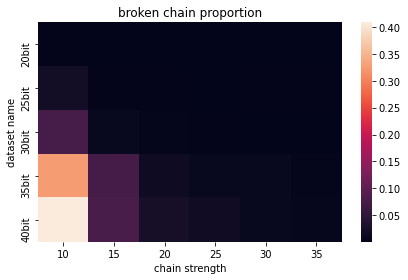

In [71]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(mean_broken_chain_proportion_list, xticklabels=new_chain_strength_list, yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('broken chain proportion')

plt.tight_layout()
plt.savefig('broken_chain_proportion.png')
plt.show()

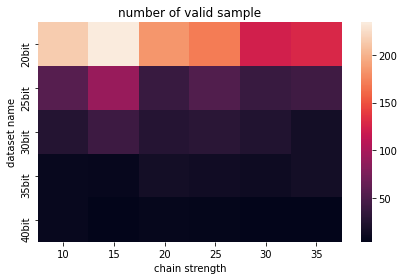

In [72]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(mean_valid_y_num_list, xticklabels=new_chain_strength_list, yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('number of valid sample')

plt.tight_layout()
plt.savefig('chain_strength_valid_y_num')
plt.show()

## chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}と決定

In [73]:
bit = 46
for jj in range(3):
    path = '../input/ost{}.csv'.format(bit)
    df = pd.read_csv(path, sep=',')
    bqm = aqa.make_Hamiltonian(df)

    for chain_strength in chain_strength_list:
        res = aqa.aws_get_response(bqm, chain_strength, num_reads)
        ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
        valid_y_info_dic = ads.find_valid_y()

        if len(valid_y_info_dic) > 0:
            broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
            broken_chain_proportion_46[chain_strength].append(statistics.mean(broken_list))
            valid_y_num_46[chain_strength].append(len(valid_y_info_dic))
        
        print('{} bit finished'.format(bit))#また位置間違えた

46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished


In [74]:
broken_chain_proportion_46

{5: [],
 10: [],
 15: [],
 20: [0.08152173913043478,
  0.021739130434782608,
  0.043478260869565216,
  0.09782608695652174],
 25: [0.0, 0.0],
 30: [0.02717391304347826, 0.010869565217391304],
 35: [0.0, 0.0, 0.0]}

In [75]:
valid_y_num_46

{5: [],
 10: [],
 15: [],
 20: [4, 1, 1, 4],
 25: [1, 2],
 30: [4, 2],
 35: [1, 1, 1]}

In [ ]:
#20bit
